<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/04_NLP%20Projects/Transfer%20Learning%20(Bert%2C%20T5%2C%20LLaMa%2C%20etc..%20(transformers)/Sentiment%20Analysis/Sentiment_Analysis_using_Vaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Summary: Sentiment Analysis on Amazon Reviews Using VADER**

##**Overview**

This project applies the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool to classify customer feedback from the Amazon Product Reviews dataset (Kaggle). After preprocessing the review text, VADER effectively categorized each review into positive, neutral, or negative sentiment, capturing both polarity and intensity with strong consistency and interpretability.


---

#**Aim of the Project**

To analyze customer opinions and detect sentiment patterns without the need for heavy model training.

To demonstrate how VADER can deliver fast, actionable sentiment insights from large review datasets.

##**Importing Libraries**

In [78]:
import transformers
import tensorflow as tf
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
import nltk

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Load Dataset from Google drive**

In [79]:
Amazon_product_reviews = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Amazon_Reviews.csv", engine="python")
Amazon_product_reviews.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"


##**Data cleaning: Confirming to know if there is null and duplicate values**

In [80]:
print(f"Columns with num values on dataset: {Amazon_product_reviews.isna().sum()}")
print("\n")
print(f"Columns with duplicate values on dataset: {Amazon_product_reviews.duplicated().sum()}")

Columns with num values on dataset: Reviewer Name           0
Profile Link           51
Country               160
Review Count          159
Review Date           159
Rating                159
Review Title          159
Review Text           159
Date of Experience    267
dtype: int64


Columns with duplicate values on dataset: 2


##**Drop null values and duplicates***

In [81]:
Amazon_product_reviews.dropna(inplace=True)
Amazon_product_reviews.drop_duplicates(inplace=True)

In [82]:
print(f"Columns with num values on dataset: {Amazon_product_reviews.isna().sum()}")
print("\n")
print(f"Columns with duplicate values on dataset: {Amazon_product_reviews.duplicated().sum()}")

Columns with num values on dataset: Reviewer Name         0
Profile Link          0
Country               0
Review Count          0
Review Date           0
Rating                0
Review Title          0
Review Text           0
Date of Experience    0
dtype: int64


Columns with duplicate values on dataset: 0


##**Converting Rating column (str) to int**

In [83]:
Amazon_product_reviews.Rating.value_counts()

,count
Rating,
Rated 1 out of 5 stars,13120
Rated 5 out of 5 stars,4447
Rated 4 out of 5 stars,1278
Rated 2 out of 5 stars,1227
Rated 3 out of 5 stars,874


In [84]:
Amazon_product_reviews['Rating'] = Amazon_product_reviews['Rating'].replace({"Rated 1 out of 5 stars":1, "Rated 2 out of 5 stars":2, "Rated 3 out of 5 stars":3, "Rated 4 out of 5 stars":4, "Rated 5 out of 5 stars":5})
Amazon_product_reviews.Rating.value_counts()

/tmp/ipython-input-2091583105.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Amazon_product_reviews['Rating'] = Amazon_product_reviews['Rating'].replace({"Rated 1 out of 5 stars":1, "Rated 2 out of 5 stars":2, "Rated 3 out of 5 stars":3, "Rated 4 out of 5 stars":4, "Rated 5 out of 5 stars":5})


,count
Rating,
1,13120
5,4447
4,1278
2,1227
3,874


##**Bar_Chart Representation**

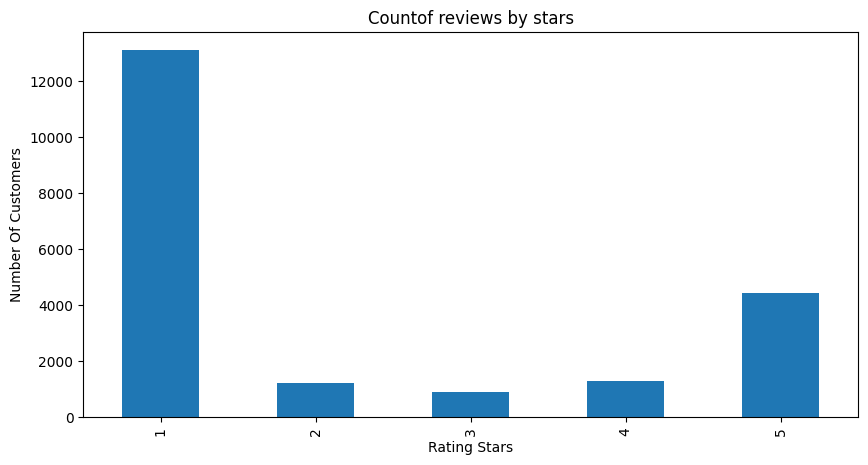

In [85]:

Amazon_product_reviews.Rating.value_counts().sort_index() \
.plot(kind="bar", title= "Countof reviews by stars", figsize=(10,5))
plt.xlabel("Rating Stars")
plt.ylabel("Number Of Customers")
plt.show()

##**Creating an example sample from my dataset to see what nltk does with the example**

In [86]:
example = Amazon_product_reviews['Review Text'][50]
example

"My product was left on the street porch where anyone could pick it up and steal it. I was at home all day waiting for this but the person handling my delivery never bothered to even ring the door bell or anything, just left it outside.I am very disappointed in such service. If it wasn't for the email notification letting me know my parcel had been delivered, I wouldn't have know to look for it as fast as I did.I highly recommend NOT using their delivery services. They are the worst."

##**Tokenized sentence**

In [87]:
nltk.download('punkt_tab')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['My',
 'product',
 'was',
 'left',
 'on',
 'the',
 'street',
 'porch',
 'where',
 'anyone']

##**Part of speech each word belongs too**

In [88]:
nltk.download('averaged_perceptron_tagger_eng')
pos = nltk.pos_tag(tokens)
pos[:5]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('My', 'PRP$'),
 ('product', 'NN'),
 ('was', 'VBD'),
 ('left', 'VBN'),
 ('on', 'IN')]

##** preparing model for sentiment model from nltk to analyze text**

In [89]:
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sia

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##**Texting on example**

In [90]:
sia.polarity_scores(example)

{'neg': 0.122, 'neu': 0.818, 'pos': 0.06, 'compound': -0.8024}

##**Running model on my main Text data's iterating through all** progress bar was used to monitor progress.

In [91]:
res = {}

for i, row in tqdm(Amazon_product_reviews.iterrows(), total = len(Amazon_product_reviews)):
  text = row["Review Text"]
  names = row["Reviewer Name"]
  res[names] = sia.polarity_scores(text)

  0%|          | 0/20946 [00:00<?, ?it/s]

##**Merging varders result with dataframe**

In [92]:
Vaders = pd.DataFrame(res).T
Vaders = Vaders.merge(Amazon_product_reviews, left_index=True, right_on='Reviewer Name', how="left")
Vaders[:4]

,neg,neu,pos,compound,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,0.047,0.834,0.120,0.8432,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,1,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,0.131,0.823,0.046,-0.7096,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,1,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,0.128,0.872,0.000,-0.9276,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,1,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,0.205,0.716,0.079,-0.8947,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,1,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"


##**Bar_chart of what Vaders compound represents**

/tmp/ipython-input-1492927762.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="compound", palette="viridis")


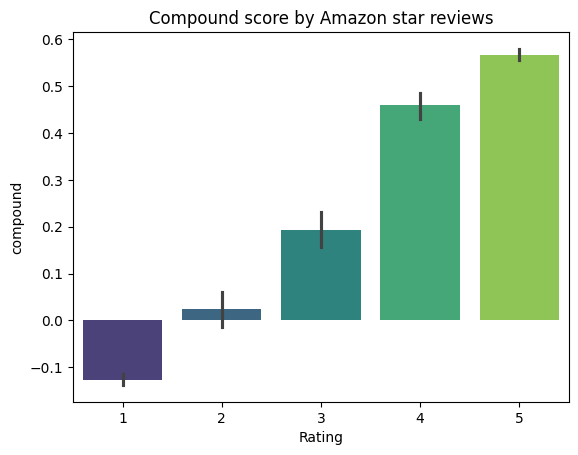



What this Means
Negative reviews has low compound score (eg: Rating 1,2,3) And Positive reviews has high compound score(eg. Rating 4,5




In [93]:
sns.barplot(data=Vaders, x="Rating", y="compound", palette="viridis")
plt.title("Compound score by Amazon star reviews")
plt.show()
print("\n")
print("What this Means")
print("Negative reviews has low compound score (eg: Rating 1,2,3) And Positive reviews has high compound score(eg. Rating 4,5")
print("\n")

##**Visualizing them by negative, neutral and positive reviews**

/tmp/ipython-input-201187859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="neg", ax = axs[0], palette="viridis")
/tmp/ipython-input-201187859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="neu", ax = axs[1], palette="plasma")
/tmp/ipython-input-201187859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="pos", ax = axs[2], palette="magma")


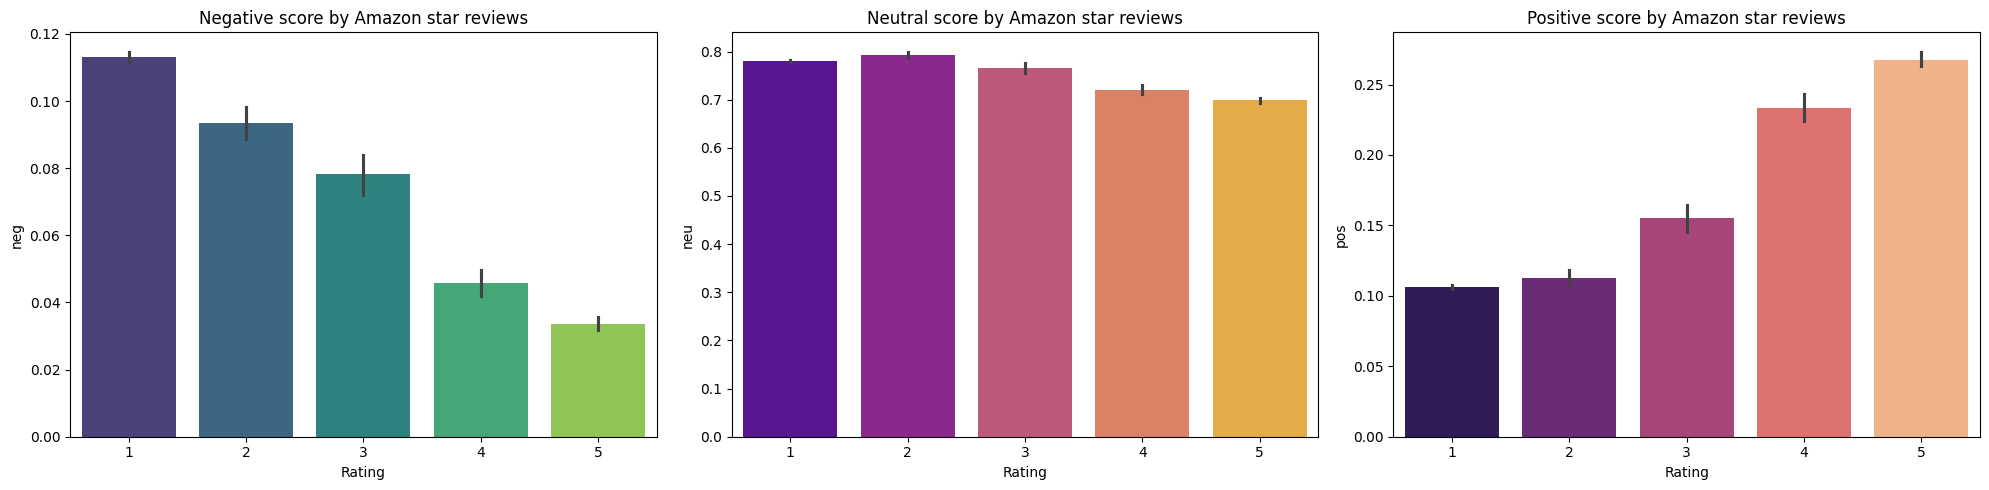

In [94]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.barplot(data=Vaders, x="Rating", y="neg", ax = axs[0], palette="viridis")
sns.barplot(data=Vaders, x="Rating", y="neu", ax = axs[1], palette="plasma")
sns.barplot(data=Vaders, x="Rating", y="pos", ax = axs[2], palette="magma")
axs[0].set_title("Negative score by Amazon star reviews")
axs[1].set_title("Neutral score by Amazon star reviews")
axs[2].set_title("Positive score by Amazon star reviews")
plt.tight_layout()
plt.show()

##**As you can see Negative goes downwards, neural try to maintain its level while positive goes upward**

##**Result:** Take note Scores grater than 0.5 are positive and scores below 0.5 are either neutral or negative reviews 👍

In [95]:
Vaders_result = Vaders[["compound", "Rating", "Review Text"]]
print(Vaders_result)

       compound  Rating                                        Review Text
0        0.8432       1  I registered on the website, tried to order a ...
1       -0.7096       1  Had multiple orders one turned up and driver h...
2       -0.9276       1  I informed these reprobates that I WOULD NOT B...
3       -0.8947       1  I have bought from Amazon before and no proble...
4       -0.7327       1  If I could give a lower rate I would! I cancel...
...         ...     ...                                                ...
21209    0.8908       5  I have had perfect order fulfillment, and fast...
21210    0.9258       5  I have had perfect order fulfillment, and fast...
21211    0.2362       3  I always find myself going back to amazon beco...
21212    0.9184       5  I have placed an abundance of orders with Amaz...
21213    0.4404       4  those goods i've ordered by Amazon.com, have b...

[20946 rows x 3 columns]


#**Conclusion**

When deployed, this sentiment analysis system can:

Automatically score customer reviews and label their sentiment in real time.

Support e-commerce platforms, product analytics dashboards, and customer feedback systems.

Help businesses monitor brand perception, detect dissatisfaction, and understand user experiences at scale.


The project highlights VADER as a lightweight but powerful tool for sentiment interpretation in real-world review data.
